In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import matplotlib.ticker as ticker

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns =['Unnamed: 0', 'MA_Six_Months', 'MA_One_Year'], inplace = True)
stocks

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $
0,2015-01-02,Amazon,55664000,15.4260,15.6290,15.7375,15.3480
1,2015-01-05,Amazon,55484000,15.1095,15.3505,15.4190,15.0425
2,2015-01-06,Amazon,70380000,14.7645,15.1120,15.1500,14.6190
3,2015-01-07,Amazon,52806000,14.9210,14.8750,15.0640,14.7665
4,2015-01-08,Amazon,61768000,15.0230,15.0160,15.1570,14.8055
...,...,...,...,...,...,...,...
15091,2024-12-24,Tesla,59551800,462.2800,435.9000,462.7800,435.1400
15092,2024-12-26,Tesla,76366400,454.1300,465.1600,465.3300,451.0200
15093,2024-12-27,Tesla,82666800,431.6600,449.5200,450.0000,426.5000
15094,2024-12-30,Tesla,64941000,417.4100,419.4000,427.0000,415.7500


In [3]:
# Dropping columns of non-numerical value
stocks = stocks[['Volume', 'Close in $', 'Open in $', 'High in $', 'Low in $']]
stocks

,Volume,Close in $,Open in $,High in $,Low in $
0,55664000,15.4260,15.6290,15.7375,15.3480
1,55484000,15.1095,15.3505,15.4190,15.0425
2,70380000,14.7645,15.1120,15.1500,14.6190
3,52806000,14.9210,14.8750,15.0640,14.7665
4,61768000,15.0230,15.0160,15.1570,14.8055
...,...,...,...,...,...
15091,59551800,462.2800,435.9000,462.7800,435.1400
15092,76366400,454.1300,465.1600,465.3300,451.0200
15093,82666800,431.6600,449.5200,450.0000,426.5000
15094,64941000,417.4100,419.4000,427.0000,415.7500


In [4]:
clusters = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in clusters] # Defines k-means clusters in the range assigned above.

In [5]:
score = [kmeans[i].fit(stocks).score(stocks) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5.907825724990755e+19,
 -2.3464325435903726e+19,
 -1.1652132799099922e+19,
 -7.095703754314591e+18,
 -4.840215967272654e+18,
 -3.5871780838068787e+18,
 -2.704194053628912e+18,
 -2.165548766660745e+18,
 -1.708205500782904e+18]

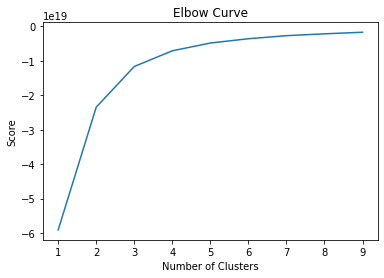

In [6]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [7]:
# There's a jump from 2 to 3 on the x axis, but after that, the curve straightens out. 
# That means the optimal number of clusters should be 4

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [9]:
# Fit the k-means object to the data.

kmeans.fit(stocks)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [10]:
stocks['clusters'] = kmeans.fit_predict(stocks)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/t8/xh28456s3kngn8qzvmt25b700000gn/T/ipykernel_45581/2159357975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks['clusters'] = kmeans.fit_predict(stocks)


In [11]:
stocks.head(20)

,Volume,Close in $,Open in $,High in $,Low in $,clusters
0,55664000,15.4260,15.6290,15.7375,15.3480,0
1,55484000,15.1095,15.3505,15.4190,15.0425,0
2,70380000,14.7645,15.1120,15.1500,14.6190,1
3,52806000,14.9210,14.8750,15.0640,14.7665,0
4,61768000,15.0230,15.0160,15.1570,14.8055,0
5,51848000,14.8465,15.0740,15.1435,14.8340,0
6,68428000,14.5705,14.8780,14.9255,14.4640,1
7,82728000,14.7370,14.8740,15.0750,14.6615,1
8,110774000,14.6635,14.5965,14.7955,14.3250,1
9,88384000,14.3475,14.7000,14.8000,14.3410,1


In [12]:
stocks['clusters'].value_counts()

0    9589
1    4690
2     817
Name: clusters, dtype: int64

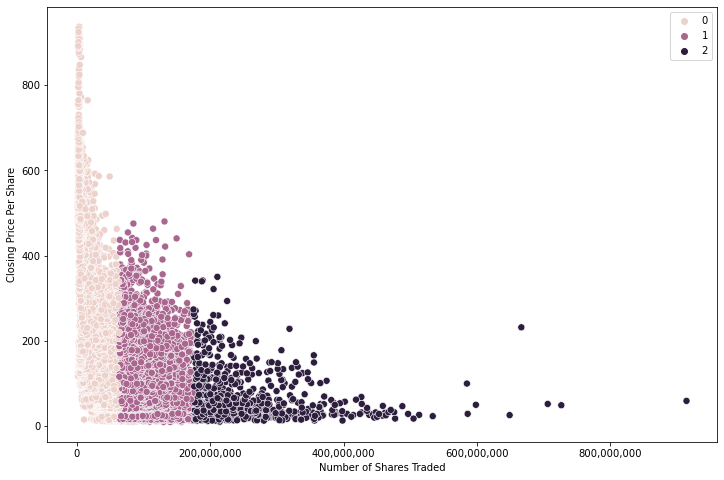

In [13]:
# Plot the clusters for the "Volume" and "Close/Last in $" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = stocks['Volume'] , y = stocks['Close in $'], hue = kmeans.labels_, s = 50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Shares Traded') # Label x-axis.
plt.ylabel('Closing Price Per Share') # Label y-axis.
x_ticks = np.arange(0, 1500000000, 100000000)
y_ticks = np.arange(0, 900, 100)
ax.ticklabel_format(style='plain')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [14]:
# The first cluster in salmon colored (coded as 0) gathers more data points relating to dates with a higher closing price yet lower number of shares traded 
# The last cluster in purple (coded as 2) gathers more data points relating to dates with a lower closing price yet relative higher number of shares traded 

In [15]:
stocks.loc[stocks['clusters'] == 2, 'cluster'] = 'dark purple'
stocks.loc[stocks['clusters'] == 1, 'cluster'] = 'purple'
stocks.loc[stocks['clusters'] == 0, 'cluster'] = 'salmon colored'

In [16]:
stocks.groupby('cluster').agg({'Volume':['mean', 'median'], 
                         'Close in $':['mean', 'median']})

Volume               Close in $           
                        mean       median        mean     median
cluster                                                         
dark purple     2.468309e+08  219374400.0   63.100276   37.65470
purple          1.006173e+08   94565500.0  105.308396   84.81375
salmon colored  2.584384e+07   22169500.0  221.037446  180.96000

In [17]:
# The average closing price per share received for the dark purple cluster group is at least $60 dollars with the average volume of shares over 200 million shares
# The average closing price per share received for the salmon colored cluster group is at least $220 dollars with the average volume of shares over 25 million shares
# Supports hypothesis: If the closing price is low, more shares are traded